C:\Users\25273141\AppData\Local\Temp\ipykernel_12532\2440223124.py:19: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  l_rawdata.loc[:,'loan_condition']=np.where(l_rawdata.loc[:,'loan_condition']=='Bad Loan',1,0)


(3387379, 30)
[(0, 2146725), (1, 1240654)] (3387379,)


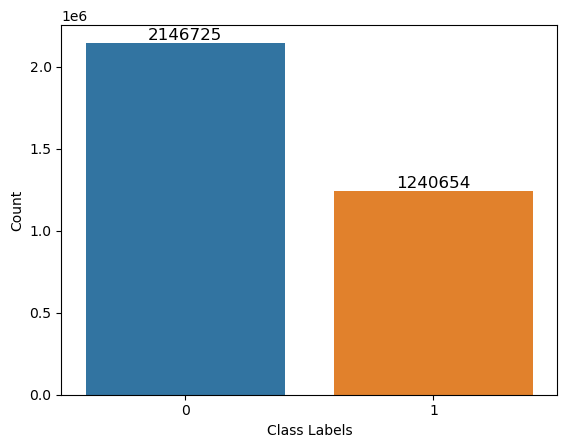

In [1]:
# importing file reading, sampling, model, evaluation, visualization libraries
import os,pandas as pd,numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn import tree
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# setting up working directory
os.chdir("C:\\Users\\25273141\\OneDrive - Edge Hill University\\Publish\\Data\\Irish Loan Data\\loan")

# reading the train csv file from local system
l_rawdata=pd.read_csv("loan_data.csv", header =0).round(0)
l_rawdata.loc[:,'loan_condition']=np.where(l_rawdata.loc[:,'loan_condition']=='Bad Loan',1,0)
required_columns=['emp_length_int', 'home_ownership', 'home_ownership_cat','income_category', 'annual_inc', 'income_cat', 'loan_amount', 'term','term_cat', 'application_type', 'application_type_cat', 'purpose','purpose_cat', 'interest_payments', 'interest_payment_cat','interest_rate', 'grade', 'grade_cat', 'dti','total_pymnt', 'total_rec_prncp', 'recoveries', 'installment','region']
print(l_rawdata.shape)
# keep only 10 columns in x dataset
X=l_rawdata.loc[:,required_columns]

# keep output variable in y dataset
y=l_rawdata.loc[:,'loan_condition']
# display class wise total records
print(sorted(Counter(y).items()), y.shape)
# Calculate class counts
class_counts = y.value_counts()

# Create a bar chart for class balance
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')

# Annotate the bars with count values
for i, count in enumerate(class_counts.values):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['home_ownership_cat','income_category','income_cat','term_cat','application_type','application_type_cat','purpose','purpose_cat','interest_payment_cat','grade','grade_cat', 'region']
cat_numbers = [l_rawdata.columns.get_loc(col) for col in categorical_columns]

label_encoder = LabelEncoder()
for i in cat_numbers:
    l_rawdata.iloc[:,i] = label_encoder.fit_transform(l_rawdata.iloc[:,i])
    l_rawdata.iloc[:,i] = l_rawdata.iloc[:,i].astype('category')
print(round(l_rawdata.describe(include=['float', 'int']),2))
print(round(l_rawdata.describe(include=['category','object']),2))

C:\Users\25273141\AppData\Local\Temp\ipykernel_12532\2235682937.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  l_rawdata.iloc[:,i] = label_encoder.fit_transform(l_rawdata.iloc[:,i])
C:\Users\25273141\AppData\Local\Temp\ipykernel_12532\2235682937.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  l_rawdata.iloc[:,i] = label_encoder.fit_transform(l_rawdata.iloc[:,i])
C:\Users\25273141\AppData\Local\Temp\ipykernel_12532\2235682937.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inpl

                id        year     final_d  emp_length_int  annual_inc  \
count   3387379.00  3387379.00  3387379.00      3387379.00  3387379.00   
mean    8762594.17     2010.17  1060524.22            5.28    70650.93   
std    18328366.14        2.47    38256.86            3.57    57869.52   
min       54734.00     2007.00  1012008.00           -2.00        0.00   
25%      261633.00     2008.00  1022012.00            2.00    37850.00   
50%      379579.00     2009.00  1062009.00            5.00    58800.00   
75%     1032094.50     2011.00  1092011.00            9.00    85000.00   
max    68617057.00     2015.00  1122015.00           14.00  9500000.00   

       loan_amount  loan_condition  loan_condition_cat  interest_rate  \
count   3387379.00      3387379.00          3387379.00     3387379.00   
mean      10695.13            0.37                0.38          13.28   
std        7145.20            0.48                0.49           3.58   
min         500.00            0.00       

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns=['home_ownership_cat','income_category','income_cat','term_cat','application_type','application_type_cat','purpose','purpose_cat','interest_payment_cat','grade','grade_cat', 'region']
cat_numbers = [X.columns.get_loc(col) for col in categorical_columns]

for i in cat_numbers:
    X.iloc[:,i] = label_encoder.fit_transform(X.iloc[:,i])
    X.iloc[:,i] = X.iloc[:,i].astype('category')

X_raw_train, X_eval, y_raw_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
xy_eval=pd.concat([X_eval,y_eval], axis=1)
#xy_eval.to_csv('xy_eval.csv')
print(len(y_raw_train))
print(len(y_eval))

X_train, X_test, y_train, y_test = train_test_split(X_raw_train, y_raw_train, test_size=0.2, random_state=42,stratify=y_raw_train)
# import decision tree library
from sklearn import tree

# import evaluation metrics librsary
from sklearn.metrics import classification_report

# initializing decision tree algorithm
DT_model=tree.DecisionTreeClassifier()

# passing the train independent metrics with dependent variable to the decision tree model
DT_model.fit(X_raw_train, y_raw_train)

import pickle
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(DT_model, file)
import datetime
# store the start time
start_time = datetime.datetime.now()

def count_nodes_passed(record, DT_model):
    node_indicator = DT_model.decision_path([record])
    leaf_ids = DT_model.apply([record])
    total_nodes_passed = node_indicator.indices.shape[0] - len(set(leaf_ids))
    return total_nodes_passed

total_nodes_passed=0
nod_train={}
nod_train_index_list={}


for i in range(0,len(X_train)):
    print(i)
    record=X_train.iloc[:,:].values[i]
    nodes_passed = count_nodes_passed(record, DT_model)
    if nodes_passed not in nod_train_index_list:
        nod_train_index_list[nodes_passed] = []
    nod_train_index_list[nodes_passed].append(i)
    if nodes_passed in nod_train:
        nod_train[nodes_passed] +=1
    else:
        nod_train[nodes_passed] =1     
print(nod_train_index_list)

total_nodes_passed=0
nod_test={}
nod_test_index_list={}

for i in range(0,len(X_test)):
    print(i)
    record=X_test.iloc[:,:].values[i]
    nodes_passed = count_nodes_passed(record, DT_model)
    if nodes_passed not in nod_test_index_list:
        nod_test_index_list[nodes_passed] = []
    nod_test_index_list[nodes_passed].append(i)
    if nodes_passed in nod_test:
        nod_test[nodes_passed] +=1
    else:
        nod_test[nodes_passed] =1     
print(nod_test_index_list)

total_nodes_passed=0
nod_eval={}
nod_eval_index_list={}

for i in range(0,len(X_eval)):
    print(i)
    record=X_eval.iloc[:,:].values[i]
    nodes_passed = count_nodes_passed(record, DT_model)
    if nodes_passed not in nod_eval_index_list:
        nod_eval_index_list[nodes_passed] = []
    nod_eval_index_list[nodes_passed].append(i)
    if nodes_passed in nod_eval:
        nod_eval[nodes_passed] +=1
    else:
        nod_eval[nodes_passed] =1     
print(nod_eval_index_list)

# store the finish time
finish_time = datetime.datetime.now()
print('time taken for the DF model', finish_time-start_time)

In [3]:
# importing file reading, sampling, model, evaluation, visualization libraries
import os,pandas as pd,numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# setting up working directory
os.chdir("C:\\Users\\25273141\\OneDrive - Edge Hill University\\Publish\\Data\\Irish Loan Data\\loan")

# reading the train csv file from local system
loan_raw_train=pd.read_csv("xy_raw_train_publish.csv", header =0).round(0)
required_columns=['emp_length_int', 'home_ownership', 'home_ownership_cat','income_category', 'annual_inc', 'income_cat', 'loan_amount', 'term','term_cat', 'application_type', 'application_type_cat', 'purpose','purpose_cat', 'interest_payments', 'interest_payment_cat','interest_rate', 'grade', 'grade_cat', 'dti','total_pymnt', 'total_rec_prncp', 'recoveries', 'installment','region']
X_raw_train=loan_raw_train.loc[:,required_columns]

#convert some variables into categoricals
req_numbers = [X_raw_train.columns.get_loc(col) for col in required_columns]
X_raw_train=loan_raw_train.iloc[:,1:27]
categorical_columns=['home_ownership_cat','income_category','income_cat','term_cat','application_type','application_type_cat','purpose','purpose_cat','interest_payment_cat','grade','grade_cat', 'region']
cat_numbers = [X_raw_train.columns.get_loc(col) for col in categorical_columns]

label_encoder = LabelEncoder()
for i in cat_numbers:
    X_raw_train.iloc[:,i] = label_encoder.fit_transform(X_raw_train.iloc[:,i])
    X_raw_train.iloc[:,i] = X_raw_train.iloc[:,i].astype('category')

# keep output variable in y dataset
y_raw_train=loan_raw_train.iloc[:,27]
print(sorted(Counter(y_raw_train).items()), y_raw_train.shape)

# reading the train csv file from local system
loan_train=pd.read_csv("xy_train_publish.csv", header =0).round(0)
X_train=loan_train.loc[:,required_columns]

#convert some variables into categoricals
req_numbers = [X_train.columns.get_loc(col) for col in required_columns]
cat_numbers = [X_train.columns.get_loc(col) for col in categorical_columns]
for i in cat_numbers:
    X_train.iloc[:,i] = label_encoder.fit_transform(X_train.iloc[:,i])
    X_train.iloc[:,i] = X_train.iloc[:,i].astype('category')

# keep output variable in y dataset
y_train=loan_train.iloc[:,27]

# reading the test csv file from local system
loan_test=pd.read_csv("xy_test_publish.csv", header =0).round(0)
X_test=loan_test.loc[:,required_columns]

#convert some variables into categoricals
req_numbers = [X_test.columns.get_loc(col) for col in required_columns]
cat_numbers = [X_test.columns.get_loc(col) for col in categorical_columns]
for i in cat_numbers:
    X_test.iloc[:,i] = label_encoder.fit_transform(X_test.iloc[:,i])
    X_test.iloc[:,i] = X_test.iloc[:,i].astype('category')


# keep output variable in y dataset
y_test=loan_test.iloc[:,27]

# reading the train csv file from local system
loan_eval=pd.read_csv("xy_eval_publish.csv", header =0).round(0)
X_raw_eval=loan_eval.loc[:,required_columns]

#convert some variables into categoricals
req_numbers = [X_raw_eval.columns.get_loc(col) for col in required_columns]
cat_numbers = [X_raw_eval.columns.get_loc(col) for col in categorical_columns]
for i in cat_numbers:
    X_raw_eval.iloc[:,i] = label_encoder.fit_transform(X_raw_eval.iloc[:,i])
    X_raw_eval.iloc[:,i] = X_raw_eval.iloc[:,i].astype('category')

# keep output variable in y dataset
y_raw_eval=loan_eval.iloc[:,27]


[(0, 1717380), (1, 992523)] (2709903,)


In [ ]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x1.extend(nod_train_index_list[2])
x1.extend(nod_train_index_list[4])
x1.extend(nod_train_index_list[6])
x1.extend(nod_train_index_list[7])
x1.extend(nod_train_index_list[8])
x1.extend(nod_train_index_list[9])
x1.extend(nod_train_index_list[10])
x2.extend(nod_train_index_list[11])
x2.extend(nod_train_index_list[12])
x2.extend(nod_train_index_list[13])
x2.extend(nod_train_index_list[14])
x2.extend(nod_train_index_list[15])
x2.extend(nod_train_index_list[16])
x2.extend(nod_train_index_list[17])
x2.extend(nod_train_index_list[18])
x2.extend(nod_train_index_list[19])
x2.extend(nod_train_index_list[20])
x2.extend(nod_train_index_list[21])
x2.extend(nod_train_index_list[22])
x2.extend(nod_train_index_list[23])
x2.extend(nod_train_index_list[24])
x2.extend(nod_train_index_list[25])
x3.extend(nod_train_index_list[26])
x3.extend(nod_train_index_list[27])
x3.extend(nod_train_index_list[28])
x3.extend(nod_train_index_list[29])
x3.extend(nod_train_index_list[30])
x4.extend(nod_train_index_list[31])
x4.extend(nod_train_index_list[32])
x4.extend(nod_train_index_list[33])
x4.extend(nod_train_index_list[34])
x5.extend(nod_train_index_list[35])
x5.extend(nod_train_index_list[36])
x5.extend(nod_train_index_list[37])
x5.extend(nod_train_index_list[38])
x5.extend(nod_train_index_list[39])
x6.extend(nod_train_index_list[40])
x6.extend(nod_train_index_list[41])
x6.extend(nod_train_index_list[42])
x6.extend(nod_train_index_list[43])
x6.extend(nod_train_index_list[44])
x6.extend(nod_train_index_list[45])
x6.extend(nod_train_index_list[46])
x6.extend(nod_train_index_list[47])
x6.extend(nod_train_index_list[48])
x6.extend(nod_train_index_list[49])
x6.extend(nod_train_index_list[50])
x6.extend(nod_train_index_list[51])
x6.extend(nod_train_index_list[52])
x6.extend(nod_train_index_list[53])
x6.extend(nod_train_index_list[54])
x6.extend(nod_train_index_list[55])
x6.extend(nod_train_index_list[56])
x6.extend(nod_train_index_list[57])
x6.extend(nod_train_index_list[58])
x6.extend(nod_train_index_list[59])
x6.extend(nod_train_index_list[60])
x6.extend(nod_train_index_list[61])
x6.extend(nod_train_index_list[62])
x6.extend(nod_train_index_list[63])
x6.extend(nod_train_index_list[64])
x6.extend(nod_train_index_list[65])
x6.extend(nod_train_index_list[66])
x6.extend(nod_train_index_list[67])
x6.extend(nod_train_index_list[68])
x6.extend(nod_train_index_list[69])
x6.extend(nod_train_index_list[70])
x6.extend(nod_train_index_list[71])
x6.extend(nod_train_index_list[72])

In [ ]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
y1.extend(nod_test_index_list[2])
y1.extend(nod_test_index_list[4])
y1.extend(nod_test_index_list[6])
y1.extend(nod_test_index_list[7])
y1.extend(nod_test_index_list[8])
y1.extend(nod_test_index_list[9])
y1.extend(nod_test_index_list[10])
y2.extend(nod_test_index_list[11])
y2.extend(nod_test_index_list[12])
y2.extend(nod_test_index_list[13])
y2.extend(nod_test_index_list[14])
y2.extend(nod_test_index_list[15])
y2.extend(nod_test_index_list[16])
y2.extend(nod_test_index_list[17])
y2.extend(nod_test_index_list[18])
y2.extend(nod_test_index_list[19])
y2.extend(nod_test_index_list[20])
y2.extend(nod_test_index_list[21])
y2.extend(nod_test_index_list[22])
y2.extend(nod_test_index_list[23])
y2.extend(nod_test_index_list[24])
y2.extend(nod_test_index_list[25])
y3.extend(nod_test_index_list[26])
y3.extend(nod_test_index_list[27])
y3.extend(nod_test_index_list[28])
y3.extend(nod_test_index_list[29])
y3.extend(nod_test_index_list[30])
y4.extend(nod_test_index_list[31])
y4.extend(nod_test_index_list[32])
y4.extend(nod_test_index_list[33])
y4.extend(nod_test_index_list[34])
y5.extend(nod_test_index_list[35])
y5.extend(nod_test_index_list[36])
y5.extend(nod_test_index_list[37])
y5.extend(nod_test_index_list[38])
y5.extend(nod_test_index_list[39])
y6.extend(nod_test_index_list[40])
y6.extend(nod_test_index_list[41])
y6.extend(nod_test_index_list[42])
y6.extend(nod_test_index_list[43])
y6.extend(nod_test_index_list[44])
y6.extend(nod_test_index_list[45])
y6.extend(nod_test_index_list[46])
y6.extend(nod_test_index_list[47])
y6.extend(nod_test_index_list[48])
y6.extend(nod_test_index_list[49])
y6.extend(nod_test_index_list[50])
y6.extend(nod_test_index_list[51])
y6.extend(nod_test_index_list[52])
y6.extend(nod_test_index_list[53])
y6.extend(nod_test_index_list[54])
y6.extend(nod_test_index_list[55])
y6.extend(nod_test_index_list[56])
y6.extend(nod_test_index_list[57])
y6.extend(nod_test_index_list[58])
y6.extend(nod_test_index_list[59])
y6.extend(nod_test_index_list[60])
y6.extend(nod_test_index_list[61])
y6.extend(nod_test_index_list[62])
y6.extend(nod_test_index_list[63])
y6.extend(nod_test_index_list[64])
y6.extend(nod_test_index_list[65])
y6.extend(nod_test_index_list[66])
y6.extend(nod_test_index_list[67])
y6.extend(nod_test_index_list[68])
y6.extend(nod_test_index_list[69])
y6.extend(nod_test_index_list[70])
y6.extend(nod_test_index_list[71])
y6.extend(nod_test_index_list[72])

In [ ]:
z1=[]
z2=[]
z3=[]
z4=[]
z5=[]
z6=[]

z1.extend(nod_eval_index_list[2])
z1.extend(nod_eval_index_list[4])
z1.extend(nod_eval_index_list[6])
z1.extend(nod_eval_index_list[7])
z1.extend(nod_eval_index_list[8])
z1.extend(nod_eval_index_list[9])
z1.extend(nod_eval_index_list[10])
z2.extend(nod_eval_index_list[11])
z2.extend(nod_eval_index_list[12])
z2.extend(nod_eval_index_list[13])
z2.extend(nod_eval_index_list[14])
z2.extend(nod_eval_index_list[15])
z2.extend(nod_eval_index_list[16])
z2.extend(nod_eval_index_list[17])
z2.extend(nod_eval_index_list[18])
z2.extend(nod_eval_index_list[19])
z2.extend(nod_eval_index_list[20])
z2.extend(nod_eval_index_list[21])
z2.extend(nod_eval_index_list[22])
z2.extend(nod_eval_index_list[23])
z2.extend(nod_eval_index_list[24])
z2.extend(nod_eval_index_list[25])
z3.extend(nod_eval_index_list[26])
z3.extend(nod_eval_index_list[27])
z3.extend(nod_eval_index_list[28])
z3.extend(nod_eval_index_list[29])
z3.extend(nod_eval_index_list[30])
z4.extend(nod_eval_index_list[31])
z4.extend(nod_eval_index_list[32])
z4.extend(nod_eval_index_list[33])
z4.extend(nod_eval_index_list[34])
z5.extend(nod_eval_index_list[35])
z5.extend(nod_eval_index_list[36])
z5.extend(nod_eval_index_list[37])
z5.extend(nod_eval_index_list[38])
z5.extend(nod_eval_index_list[39])
z6.extend(nod_eval_index_list[40])
z6.extend(nod_eval_index_list[41])
z6.extend(nod_eval_index_list[42])
z6.extend(nod_eval_index_list[43])
z6.extend(nod_eval_index_list[44])
z6.extend(nod_eval_index_list[45])
z6.extend(nod_eval_index_list[46])
z6.extend(nod_eval_index_list[47])
z6.extend(nod_eval_index_list[48])
z6.extend(nod_eval_index_list[49])
z6.extend(nod_eval_index_list[50])
z6.extend(nod_eval_index_list[51])
z6.extend(nod_eval_index_list[52])
z6.extend(nod_eval_index_list[53])
z6.extend(nod_eval_index_list[54])
z6.extend(nod_eval_index_list[55])
z6.extend(nod_eval_index_list[56])
z6.extend(nod_eval_index_list[57])
z6.extend(nod_eval_index_list[58])
z6.extend(nod_eval_index_list[59])
z6.extend(nod_eval_index_list[60])
z6.extend(nod_eval_index_list[61])
z6.extend(nod_eval_index_list[62])
z6.extend(nod_eval_index_list[63])
z6.extend(nod_eval_index_list[64])
z6.extend(nod_eval_index_list[65])
z6.extend(nod_eval_index_list[66])
z6.extend(nod_eval_index_list[67])
z6.extend(nod_eval_index_list[68])
z6.extend(nod_eval_index_list[69])
z6.extend(nod_eval_index_list[70])
z6.extend(nod_eval_index_list[71])
z6.extend(nod_eval_index_list[72])

In [ ]:
# calculate and display total records percenetage for 6 datasets 
sorted_x=sorted(Counter(nod_train).items())
per_x={}
for i in sorted_x:
    per_x[i[0]] =round((i[1]/sum(nod_train.values()))*100,2)
print(per_x)
print(len(x1))
print(len(x2))
print(len(x3))
print(len(x4))
print(len(x5))
print(len(x6))

In [ ]:
# calculate and display total records percenetage for 6 datasets 
sorted_y=sorted(Counter(nod_test).items())
per_y={}
for i in sorted_y:
    per_y[i[0]] =round((i[1]/sum(nod_test.values()))*100,2)
print(per_y)
print(len(y1))
print(len(y2))
print(len(y3))
print(len(y4))
print(len(y5))
print(len(y6))

In [ ]:
# calculate and displaz total records percenetage for 6 datasets 
sorted_z=sorted(Counter(nod_eval).items())
per_z={}
for i in sorted_z:
    per_z[i[0]] =round((i[1]/sum(nod_eval.values()))*100,2)
print(per_z)
print(len(z1))
print(len(z2))
print(len(z3))
print(len(z4))
print(len(z5))
print(len(z6))

In [ ]:
# setting up working directory
os.chdir("C:\\Users\\25273141\\OneDrive - Edge Hill University\\Publish\\Data\\Irish Loan Data\\loan\\train")

# combine x and y datsets 
df=pd.concat([X_train,y_train], axis=1)

# pass relevant lists to 6 datasets
df1=df[df.index.isin(x1)]
df2=df[df.index.isin(x2)]
df3=df[df.index.isin(x3)]
df4=df[df.index.isin(x4)]
df5=df[df.index.isin(x5)]
df6=df[df.index.isin(x6)]

# export 6 dataframes into 6 csv files
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')
df6.to_csv('df6.csv')

In [ ]:
# setting up working directory
os.chdir("C:\\Users\\25273141\\OneDrive - Edge Hill University\\Publish\\Data\\Irish Loan Data\\loan\\test")

# combine x and y datsets 
df=pd.concat([X_test,y_test], axis=1)

# pass relevant lists to 6 datasets
df1=df[df.index.isin(y1)]
df2=df[df.index.isin(y2)]
df3=df[df.index.isin(y3)]
df4=df[df.index.isin(y4)]
df5=df[df.index.isin(y5)]
df6=df[df.index.isin(y6)]

# export 6 dataframes into 6 csv files
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')
df6.to_csv('df6.csv')

In [ ]:
# setting up working directory
os.chdir("C:\\Users\\25273141\\OneDrive - Edge Hill University\\Publish\\Data\\Irish Loan Data\\loan\\eval")

# combine x and y datsets 
df=pd.concat([X_eval,y_eval], axis=1)

# pass relevant lists to 6 datasets
df1=df[df.index.isin(z1)]
df2=df[df.index.isin(z2)]
df3=df[df.index.isin(z3)]
df4=df[df.index.isin(z4)]
df5=df[df.index.isin(z5)]
df6=df[df.index.isin(z6)]

# export 6 dataframes into 6 csv files
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')
df6.to_csv('df6.csv')